<a href="https://colab.research.google.com/github/Abhimanyu2000-PS/Classification/blob/main/SVC_LoanApproval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Datasets/LoanApprovalPrediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [ ]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
#cols=['Gender','Married','Dependents','Self_Employed']
#for col in cols:
#  df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
#we have to conver all object/string into numerical value for applying algirithms.
#map is a method to convert object into number
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Married']=df['Married'].map({'No':0,'Yes':1})
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,1,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,1,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,1,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,Y
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,Y


In [ ]:
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [ ]:
df.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


In [ ]:
X=df.iloc[:,:-1]
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler #minmaxscaler is a class use to normalize the values of certain table
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        0.5       ],
       ...,
       [0.        , 1.        , 0.33333333, ..., 0.74358974, 1.        ,
        0.5       ],
       [0.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.74358974, 0.        ,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=3) #here we sre spliting the data for checking the how datas are learned by mavhine for making good models.
#test size : percentage of data we are taking from the dataset for testing.
#random state: for getting fixed accuracy all the time.


In [ ]:
X_train.shape

(429, 11)

In [ ]:
X_test

array([[0.        , 1.        , 0.66666667, ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33333333, ..., 0.74358974, 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.74358974, 1.        ,
        1.        ],
       [0.        , 1.        , 0.33333333, ..., 0.15384615, 1.        ,
        0.        ]])

In [ ]:
y_train.shape

(429,)

In [ ]:
y_test.shape

(185,)

In [ ]:
#creating model/algorithm for prediction
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_test.values

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1])

85.4054054054054


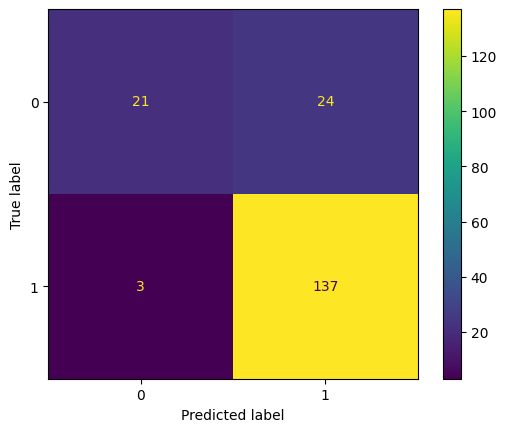

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



In [ ]:
#SVC importing
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)



SVC()

In [ ]:
y_pred=sv.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        45
           1       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



In [ ]:
#knn=85
#svc=85

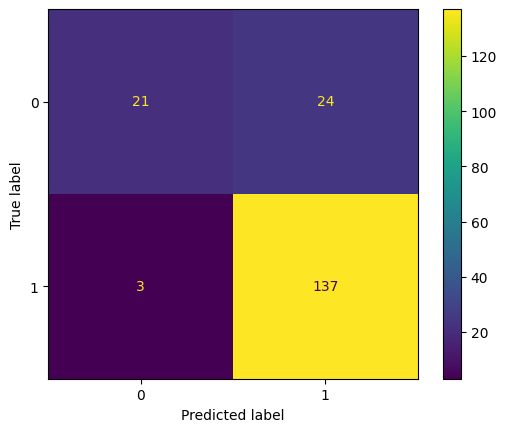

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
y_new=sv.predict(scaler.transform([[1,0,1,0,1,5542,0,12.44,32,1,2]]))
if y_new==1:
  print("Loan Approved")
else:
  print("Loan not approved")

Loan Approved
